In [2341]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import RandomOverSampler 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

Discover Data

In [2342]:
df=pd.read_csv('train.csv')
df.head()

,age,work-class,work-fnl,education,education-num,marital-status,position,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Checking all data for '?'

In [2343]:
df.isin([' ?']).sum()

age                  0
work-class        1275
work-fnl             0
education            0
education-num        0
marital-status       0
position          1279
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     409
salary               0
dtype: int64

Repalce all '?' with NULL to deal with it laterly

In [2344]:
df=df.replace(' ?',np.nan)

Understanding the data more

In [2345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22792 entries, 0 to 22791
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             22792 non-null  int64 
 1   work-class      21517 non-null  object
 2   work-fnl        22792 non-null  int64 
 3   education       22792 non-null  object
 4   education-num   22792 non-null  int64 
 5   marital-status  22792 non-null  object
 6   position        21513 non-null  object
 7   relationship    22792 non-null  object
 8   race            22792 non-null  object
 9   sex             22792 non-null  object
 10  capital-gain    22792 non-null  int64 
 11  capital-loss    22792 non-null  int64 
 12  hours-per-week  22792 non-null  int64 
 13  native-country  22383 non-null  object
 14  salary          22792 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


Checking NULL values

In [2346]:
df.isnull().sum()

age                  0
work-class        1275
work-fnl             0
education            0
education-num        0
marital-status       0
position          1279
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     409
salary               0
dtype: int64

Dealing with NULL values by replacing them with the mode of each column

In [2347]:
df['native-country'] = df['native-country'].fillna('United-States')
df['work-class'] = df['work-class'].fillna('Private')
df['position'] = df['position'].fillna('Prof-specialty')

Making sure there are no NULL values anymore

In [2348]:
df.isnull().sum()

age               0
work-class        0
work-fnl          0
education         0
education-num     0
marital-status    0
position          0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

Mapping binary values to the expected output

In [2349]:
df['salary']=df['salary'].map({' <=50K': 0, ' >50K': 1})
df['salary'].unique()

array([0, 1], dtype=int64)

Visualizing correlation between data 

In [2350]:
df.corr().style.background_gradient(cmap="Blues")

,age,work-fnl,education-num,capital-gain,capital-loss,hours-per-week,salary
age,1.000000,-0.075942,0.029503,0.075623,0.052231,0.061304,0.227398
work-fnl,-0.075942,1.000000,-0.041640,0.001790,-0.017367,-0.013148,-0.009500
education-num,0.029503,-0.041640,1.000000,0.117265,0.077367,0.142762,0.329956
capital-gain,0.075623,0.001790,0.117265,1.000000,-0.031263,0.074362,0.220680
capital-loss,0.052231,-0.017367,0.077367,-0.031263,1.000000,0.055748,0.147719
hours-per-week,0.061304,-0.013148,0.142762,0.074362,0.055748,1.000000,0.224161
salary,0.227398,-0.009500,0.329956,0.220680,0.147719,0.224161,1.000000


Dropping the almost zero correlation column 'work-fnl'

In [2351]:
df.drop(['work-fnl'], axis = 1, inplace = True)

In [2352]:
df.head()

,age,work-class,education,education-num,marital-status,position,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Combining all school grades together

In [2353]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

Dropping 'education-num' as 'education' represent the same information

In [2354]:
df.drop(['education-num'], axis = 1, inplace = True)

Groupping Eduaction values that relate to each other

In [2355]:
df['education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' School', inplace = True)
df['education'].value_counts()                             

 HS-grad         7422
 Some-college    5097
 Bachelors       3785
 School          2933
 Masters         1203
 Assoc-voc        962
 Assoc-acdm       720
 Prof-school      386
 Doctorate        284
Name: education, dtype: int64

Since majority of race is white, the rest of races can be combined together

In [2356]:
df['race'].value_counts()

 White                 19493
 Black                  2167
 Asian-Pac-Islander      712
 Amer-Indian-Eskimo      224
 Other                   196
Name: race, dtype: int64

In [2357]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [2358]:
df['race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' Other', inplace = True)

In [2359]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,22792.0,38.593542,13.657228,17.0,28.0,37.0,48.0,90.0
capital-gain,22792.0,1061.232757,7342.691929,0.0,0.0,0.0,0.0,99999.0
capital-loss,22792.0,86.730037,400.970842,0.0,0.0,0.0,0.0,4356.0
hours-per-week,22792.0,40.409705,12.283072,1.0,40.0,40.0,45.0,99.0
salary,22792.0,0.238549,0.426206,0.0,0.0,0.0,0.0,1.0


Droping Duplicates

In [2360]:
df.drop_duplicates()

,age,work-class,education,marital-status,position,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,School,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Other,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,55,Federal-gov,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0
22788,21,Private,Some-college,Never-married,Other-service,Own-child,White,Female,0,0,29,United-States,0
22789,35,Private,Some-college,Never-married,Transport-moving,Own-child,White,Male,0,0,40,United-States,0
22790,31,Self-emp-not-inc,School,Married-civ-spouse,Sales,Wife,Other,Female,0,0,50,United-States,0


Distributing data using histogram

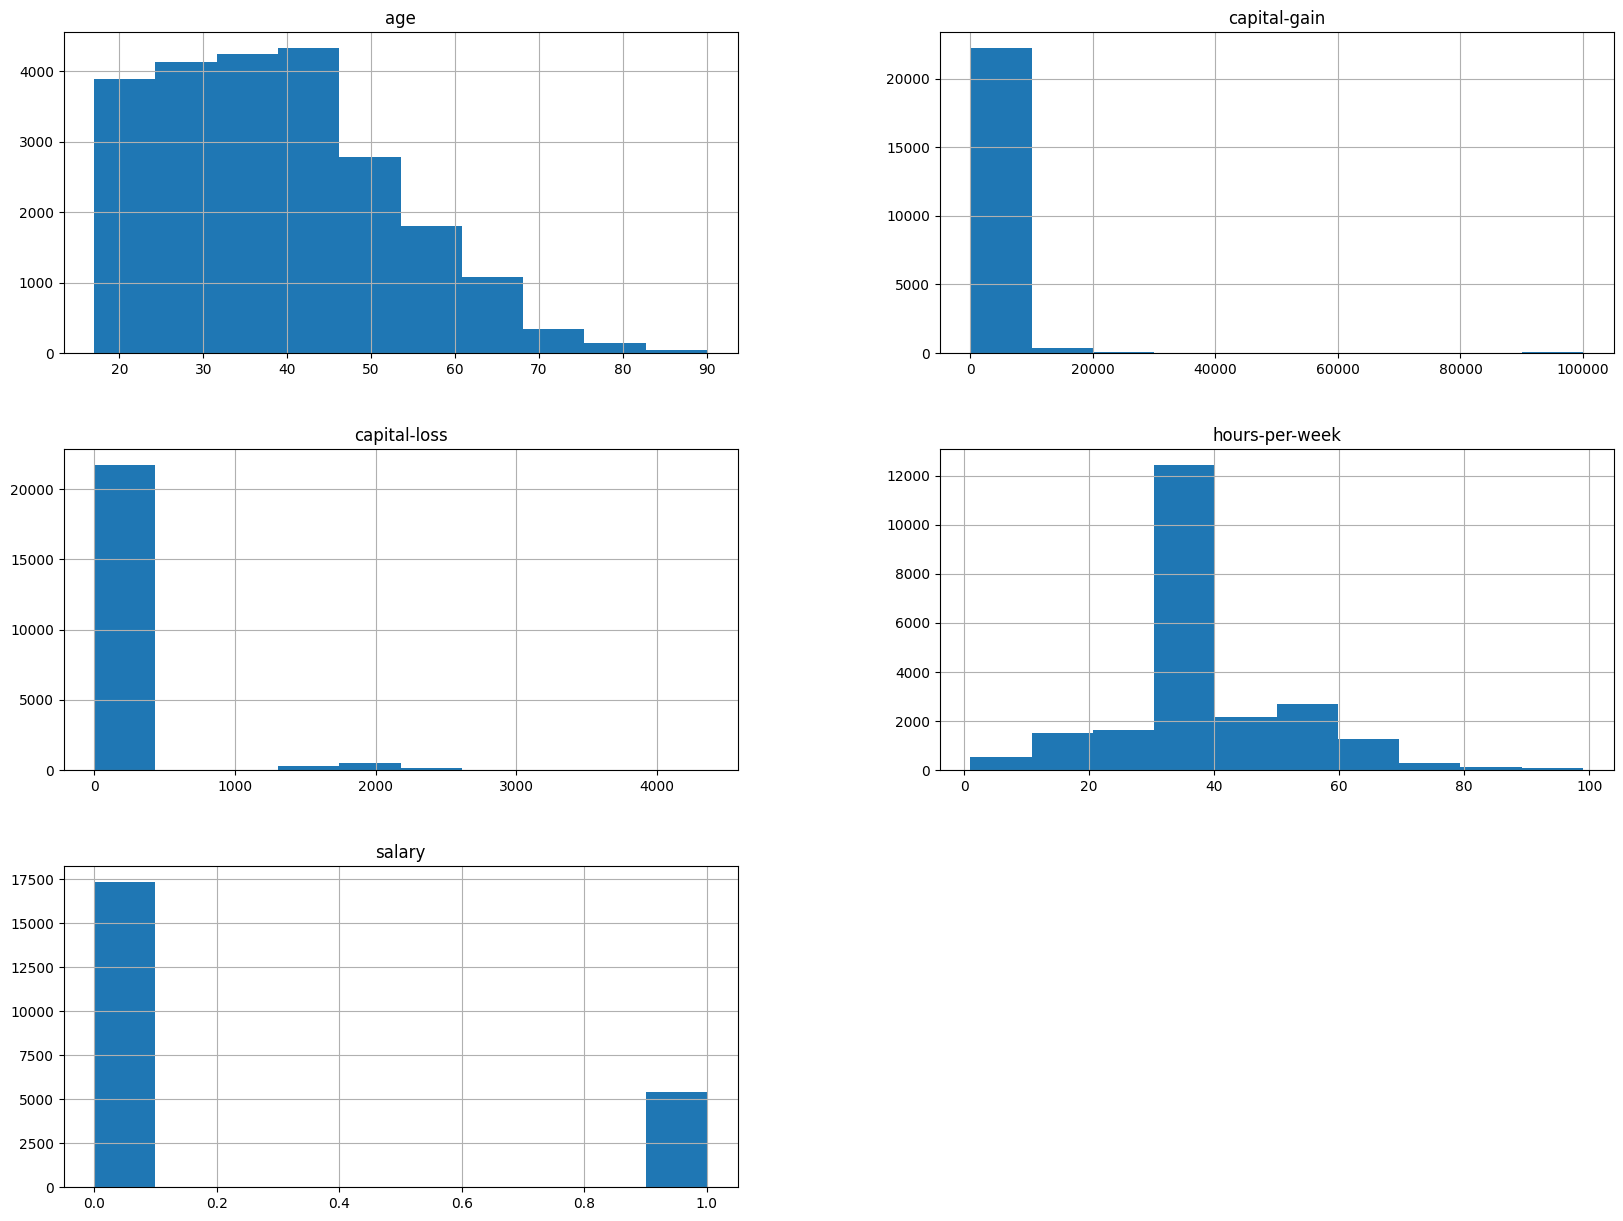

<Figure size 640x480 with 0 Axes>

In [2361]:
df.hist(figsize= [20,15])
plt.show()
plt.tight_layout()

<AxesSubplot: xlabel='salary', ylabel='count'>

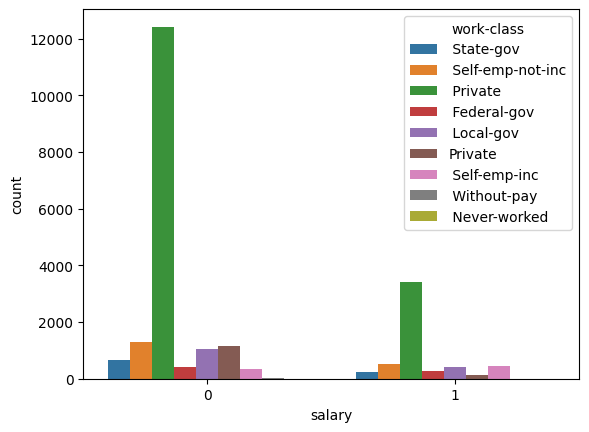

In [2362]:
sns.countplot(x = 'salary', hue = 'work-class', data = df)


<AxesSubplot: xlabel='salary', ylabel='count'>

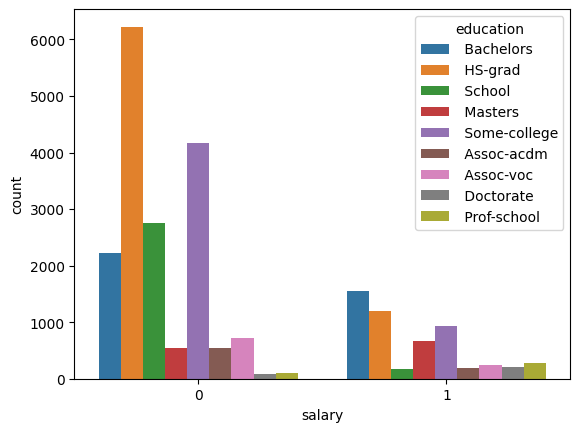

In [2363]:
sns.countplot(x = 'salary', hue = 'education', data = df)

<AxesSubplot: xlabel='salary', ylabel='count'>

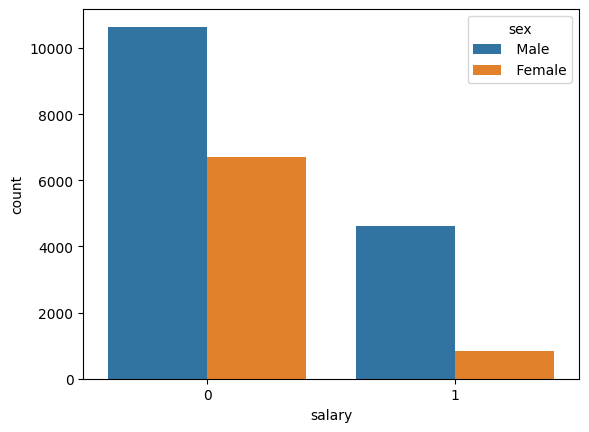

In [2364]:
sns.countplot(x = 'salary', hue = 'sex', data = df)

Splitting the data into test data and training data

In [2365]:
x = df.drop(['salary'], axis=1)
y = df['salary']

In [2366]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

Converting Object datatype columns to integer using label encoder

In [2367]:
categorical = ['work-class','education', 'marital-status', 'position', 'relationship','race', 'sex','native-country']
for i in categorical:
        le = preprocessing.LabelEncoder()
        x_train[i] = le.fit_transform(x_train[i])
        x_test[i] = le.transform(x_test[i])


In [2368]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15954 entries, 14633 to 235
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             15954 non-null  int64
 1   work-class      15954 non-null  int32
 2   education       15954 non-null  int32
 3   marital-status  15954 non-null  int32
 4   position        15954 non-null  int32
 5   relationship    15954 non-null  int32
 6   race            15954 non-null  int32
 7   sex             15954 non-null  int32
 8   capital-gain    15954 non-null  int64
 9   capital-loss    15954 non-null  int64
 10  hours-per-week  15954 non-null  int64
 11  native-country  15954 non-null  int32
dtypes: int32(8), int64(4)
memory usage: 1.1 MB


Scaling data using Standrad Scaler

In [2369]:
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [2370]:
x_train.head()

,age,work-class,education,marital-status,position,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,-0.853224,-0.237717,-0.319896,-0.398665,1.055229,2.206832,0.411050,-1.424851,0.321426,-0.214503,-0.035422,0.249833
1,0.903859,-0.237717,-0.319896,-0.398665,1.515709,-0.899062,0.411050,0.701828,-0.145212,-0.214503,3.529483,0.249833
2,0.464588,-0.237717,-0.319896,0.924743,-1.016928,0.964474,0.411050,0.701828,1.271944,-0.214503,0.612743,0.249833
3,-0.413954,-0.237717,-0.319896,-0.398665,-0.095969,-0.899062,-2.432791,0.701828,-0.145212,-0.214503,-0.035422,-1.880575
4,0.464588,-0.237717,-1.565794,-0.398665,-0.786689,-0.899062,0.411050,0.701828,-0.145212,4.728929,0.774784,0.249833


Applying models

In [2371]:
LR = LogisticRegression(solver = "liblinear")
DTC = DecisionTreeClassifier()
xgb = xgb.XGBClassifier(learining_rate = 0.1, n_estimators = 10,colsample_bytree = 0.3,max_depth = 5 ,alpha =10)
lgb = LGBMClassifier()
knn = KNeighborsClassifier(n_neighbors=1)
nvb = GaussianNB()
ada=AdaBoostClassifier()

In [2372]:
knn.fit(x_train,y_train)
output = knn.predict(x_test)
print("knn:")
print('Accuracy score:', round(knn.score(x_train, y_train) * 100, 2))

knn:
Accuracy score: 97.87


In [2373]:
nvb.fit(x_train,y_train)
output = nvb.predict(x_test)
print("nvb:")
print('Accuracy score:', round(nvb.score(x_train, y_train) * 100, 2))

nvb:
Accuracy score: 79.64


In [2374]:
xgb.fit(x_train,y_train)
output = xgb.predict(x_test)
print("xgb:")
print('Accuracy score:', round(xgb.score(x_train, y_train) * 100, 2))

[03:47:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "learining_rate" } are not used.

xgb:
Accuracy score: 85.16


In [2375]:

lgb.fit(x_train,y_train)
output = lgb.predict(x_test)
print("lgb:")
print('Accuracy score:', round(lgb.score(x_train, y_train) * 100, 2))

lgb:
Accuracy score: 89.19


In [2376]:
LR.fit(x_train,y_train)
output = LR.predict(x_test)
print("Logistic Regression:")
print('Accuracy score:', round(LR.score(x_train, y_train) * 100, 2))

Logistic Regression:
Accuracy score: 80.38


In [2377]:
DTC.fit(x_train,y_train)
output2 = DTC.predict(x_test)
print("DecisionTreeClassifier:")
print('Accuracy score:', round(DTC.score(x_train, y_train) * 100, 2))

DecisionTreeClassifier:
Accuracy score: 98.13


In [2378]:
RFC.fit(x_train,y_train)
output3 = RFC.predict(x_test)
print("RandomForestClassifier:")
print('Accuracy score:', round(RFC.score(x_train, y_train) * 100, 2))

RandomForestClassifier:
Accuracy score: 98.13


In [2379]:
ada.fit(x_train,y_train)
output3 = ada.predict(x_test)
print("AdaBoostClassifier:")
print('Accuracy score:', round(ada.score(x_train, y_train) * 100, 2))

AdaBoostClassifier:
Accuracy score: 85.92


In [2380]:
d = pd.read_csv('test.csv')

d.rename(columns = {'fnlwgt':'work-fnl'}, inplace = True)
d.rename(columns = {'workclass':'work-class'}, inplace = True)
d.rename(columns = {'occupation':'position'}, inplace = True)

d=d.replace(' ?',np.nan)

d['native-country'] = d['native-country'].fillna('United-States')
d['work-class'] = d['work-class'].fillna('Private')
d['position'] = d['position'].fillna('Prof-specialty')

d.drop(['work-fnl'], axis = 1, inplace = True)
d.drop(['education-num'], axis = 1, inplace = True)

d['education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' School', inplace = True)
d['race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' Other', inplace = True)

countries = np.array(df['native-country'].unique())
countries = np.delete(countries, 0)
#===============================================================================
features=['age', 'work-class', 'education', 'marital-status', 'position',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country']  
categorical = ['work-class','education', 'marital-status', 'position', 'relationship','race', 'sex','native-country']
for i in categorical:
        d[i] = le.fit_transform(d[i])
scaled_features = pd.DataFrame(features, columns = features)
features = scaled_features[features]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
#==========================================================================
test_x = d[features]       
test_pred = RFC.predict(test_x)       
#csv
out = pd.DataFrame({'index':d.index,'salary':test_pred})
out['salary'].replace({1:' >50K', 0:' <=50K'},inplace=True)
out.to_csv('sample_submission.csv',index = False)

ValueError: Shape of passed values is (12, 1), indices imply (12, 12)